<a href="https://colab.research.google.com/github/Joshitha18/Language_Diarization/blob/main/BTP_GMM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
pip install python_speech_features

In [ ]:
import python_speech_features
import numpy as np
import soundfile as sf
import pickle
import cv2
import glob

In [ ]:
!gdown --id 1SzFGWDqv7_GNDl0x2nKT-cE0PRiPpoK7

Downloading...
From: https://drive.google.com/uc?id=1SzFGWDqv7_GNDl0x2nKT-cE0PRiPpoK7
To: /content/telugu_feat_1000.pkl
148MB [00:01, 143MB/s]


In [ ]:
feat_file = open('telugu_feat_1000.pkl', "rb")
tel_feat = pickle.load(feat_file)

In [ ]:
len(tel_feat[0][18])

39

Step 3

In [ ]:
import numpy

In [ ]:
for i in range(0,len(tel_feat)):
  tel_feat[i] = numpy.stack( tel_feat[i], axis=0 )

t = np.array(tel_feat[0:2467]) t.shape _: samples,19,39 samples: Number of 200 ms segments time steps: No of frames in it features : mfcc

In [ ]:
#t.shape _: samples,19,39 
#samples: Number of 200 ms segments 
#time steps: No of frames in it 
#features : mfcc

In [ ]:
t = np.array(tel_feat)

In [ ]:
t.shape

(24678, 19, 39)

In [ ]:
sequence = t

In [ ]:
window_length = 19

In [ ]:
from keras.layers import Input, Dense, Conv1D, MaxPooling1D, UpSampling1D, BatchNormalization, LSTM, RepeatVector
from keras.models import Model
from keras.models import model_from_json
from keras import regularizers
import datetime
import time
import requests as req
import json
import pandas as pd
import pickle
import os
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tqdm import tqdm
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import RepeatVector
from keras.layers import TimeDistributed

# define model
n_in = 19
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(19,39)))
model.add(RepeatVector(n_in))
model.add(LSTM(100, activation='relu', return_sequences=True))
model.add(TimeDistributed(Dense(39)))
model.compile(optimizer='adam', loss='mse')

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 100)               56000     
_________________________________________________________________
repeat_vector_1 (RepeatVecto (None, 19, 100)           0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 19, 100)           80400     
_________________________________________________________________
time_distributed_1 (TimeDist (None, 19, 39)            3939      
Total params: 140,339
Trainable params: 140,339
Non-trainable params: 0
_________________________________________________________________


In [135]:
!gdown --id 1Ns3MPcG7SPOlAu6kkklH9X3A4SMXxxh3
model = models.load_model("wts_100.h5")#100

Downloading...
From: https://drive.google.com/uc?id=1Ns3MPcG7SPOlAu6kkklH9X3A4SMXxxh3
To: /content/wts_100.h5
100% 1.73M/1.73M [00:00<00:00, 53.6MB/s]


In [136]:
y_pred = model.predict(sequence, batch_size=457)

In [137]:
sequence[0][0]

array([-8.28719032e+00, -1.13347611e+01, -3.01328985e+01, -1.02183549e+00,
        5.05976291e+00,  6.01580903e+00,  1.42289013e+01,  1.76303173e+01,
        4.21620537e+00,  5.38378425e+00, -2.38234858e+00,  6.46840059e+00,
        9.40192492e+00, -6.28889692e-02, -9.51486909e-01, -3.42003309e-01,
       -9.88968581e-01, -2.08766134e+00,  3.97873890e-01, -1.34747231e+00,
       -2.45847306e-01,  2.33128228e+00, -2.42901207e-01,  9.74727779e-01,
       -1.00072325e-01, -1.33486978e+00, -1.59122761e-02,  1.37564663e-01,
        1.48142018e-01,  4.96692185e-01,  3.04829931e-01, -3.96158790e-02,
        3.91048911e-01,  3.36084104e-01, -7.19189540e-01, -3.65012013e-02,
        4.59455374e-01,  1.00436816e-02, -6.19904972e-01])

In [138]:
y_pred[0][0]

array([-7.8742456e+00, -1.2392062e+01, -2.6106621e+01, -4.5868902e+00,
        3.1828597e+00,  8.4367619e+00,  8.7706194e+00,  1.6867088e+01,
        8.6274920e+00,  1.3488873e+00,  1.4838252e+00,  3.7194910e+00,
        1.4084139e+00, -1.6332927e-01, -1.1467078e+00,  1.4366051e+00,
        6.2197125e-01,  9.6522158e-01,  4.3573570e-01,  1.3509647e+00,
       -1.0408504e+00, -1.5879958e+00,  1.9652996e+00,  1.2567148e+00,
        8.3053881e-01,  5.5359018e-01,  2.5654811e-02,  9.5644444e-01,
        4.2731982e-01,  3.9970404e-01, -8.0796635e-01, -8.1574708e-01,
        4.8582889e-02, -1.2759534e+00, -1.2692264e+00, -6.1197567e-01,
       -4.8609745e-02,  9.4737150e-02, -3.0713814e-01], dtype=float32)

In [139]:
out = model.layers[0].output
m = Model(inputs = model.input, outputs=out)

In [140]:
output = m.predict(sequence)

In [141]:
print(len(output[0]))
print(len(output))

100
24678


In [142]:
features = output

In [143]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=1)

In [144]:
gmm.fit(features)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=1, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

In [145]:
score = gmm.score_samples(features)

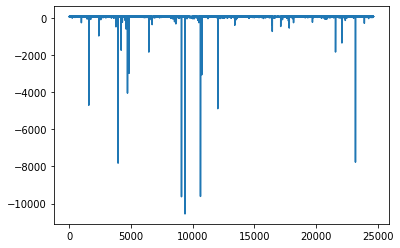

In [146]:
plt.plot(score)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


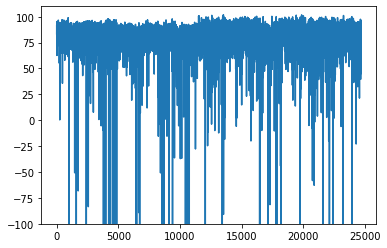

In [148]:
plt.plot(score)
ax = plt.axes()
ax.set_ylim(-100, 110)
plt.show()

In [149]:
print(score)

[83.50515481 84.70357557 87.35235955 ... 82.20661277 87.42597499
 91.24104573]


In [102]:
!gdown --id 1eFkQ6z1N8QjlePtz9QgAaEWIwIMJMUtB
from keras import models    
model = models.load_model("wts_200.h5")

Downloading...
From: https://drive.google.com/uc?id=1eFkQ6z1N8QjlePtz9QgAaEWIwIMJMUtB
To: /content/wts_200.h5
6.29MB [00:00, 98.9MB/s]


In [103]:
y_pred = model.predict(sequence, batch_size=457)

In [104]:
sequence[0][0]

array([-8.28719032e+00, -1.13347611e+01, -3.01328985e+01, -1.02183549e+00,
        5.05976291e+00,  6.01580903e+00,  1.42289013e+01,  1.76303173e+01,
        4.21620537e+00,  5.38378425e+00, -2.38234858e+00,  6.46840059e+00,
        9.40192492e+00, -6.28889692e-02, -9.51486909e-01, -3.42003309e-01,
       -9.88968581e-01, -2.08766134e+00,  3.97873890e-01, -1.34747231e+00,
       -2.45847306e-01,  2.33128228e+00, -2.42901207e-01,  9.74727779e-01,
       -1.00072325e-01, -1.33486978e+00, -1.59122761e-02,  1.37564663e-01,
        1.48142018e-01,  4.96692185e-01,  3.04829931e-01, -3.96158790e-02,
        3.91048911e-01,  3.36084104e-01, -7.19189540e-01, -3.65012013e-02,
        4.59455374e-01,  1.00436816e-02, -6.19904972e-01])

In [105]:
y_pred[0][0]

array([-1.0288649e+01, -1.0755827e+01, -2.6081814e+01, -1.0687481e+00,
        6.0645971e-02,  3.9875073e+00,  8.7360697e+00,  1.2115332e+01,
        5.9354649e+00,  1.9424919e+00,  2.1997600e+00,  8.9951582e+00,
        5.4036241e+00, -2.3610123e-01, -1.1623992e+00, -1.0099643e+00,
        1.6428951e+00,  1.1438563e+00,  1.0954878e+00,  1.1589987e+00,
        1.7964438e+00,  8.4315497e-01,  1.5437273e+00,  5.9165168e-01,
       -8.0128711e-01,  1.9000174e+00, -1.8581243e-01, -8.9539319e-01,
        4.7678262e-01, -1.4267901e-01,  6.6250461e-01,  3.7756699e-01,
       -4.7687091e-02, -2.5391478e-02, -8.0678821e-02, -2.7473769e-01,
       -4.8459804e-01, -3.2937029e-01,  1.6742127e-01], dtype=float32)

In [106]:
out = model.layers[0].output
m = Model(inputs = model.input, outputs=out)

In [107]:
output = m.predict(sequence)

In [108]:
print(len(output[0]))
print(len(output))

200
24678


In [109]:
features = output

In [110]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=1)

In [111]:
gmm.fit(features)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=1, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

In [112]:
score = gmm.score_samples(features)

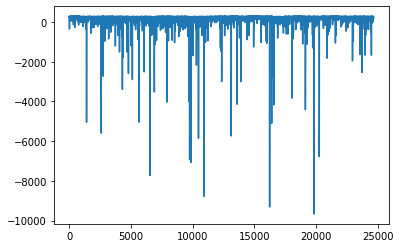

In [113]:
plt.plot(score)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


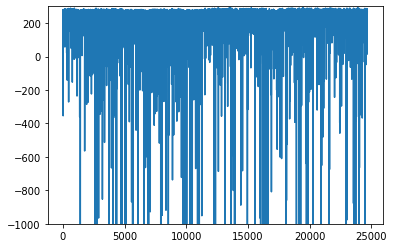

In [117]:
plt.plot(score)
ax = plt.axes()
ax.set_ylim(-1000, 300)
plt.show()

In [115]:
print(score)

[261.68439739 266.55779307 265.48265768 ... 260.51021244 264.63623213
 269.74066837]


In [118]:
!gdown --id 1nOhsFfloSNEtRQf7Bsgsvk2AFrOl93Tz
from keras import models    
model = models.load_model("wts_500.h5")

Downloading...
From: https://drive.google.com/uc?id=1nOhsFfloSNEtRQf7Bsgsvk2AFrOl93Tz
To: /content/wts_500.h5
37.3MB [00:00, 48.2MB/s]


In [119]:
y_pred = model.predict(sequence, batch_size=457)

In [120]:
sequence[0][0]

array([-8.28719032e+00, -1.13347611e+01, -3.01328985e+01, -1.02183549e+00,
        5.05976291e+00,  6.01580903e+00,  1.42289013e+01,  1.76303173e+01,
        4.21620537e+00,  5.38378425e+00, -2.38234858e+00,  6.46840059e+00,
        9.40192492e+00, -6.28889692e-02, -9.51486909e-01, -3.42003309e-01,
       -9.88968581e-01, -2.08766134e+00,  3.97873890e-01, -1.34747231e+00,
       -2.45847306e-01,  2.33128228e+00, -2.42901207e-01,  9.74727779e-01,
       -1.00072325e-01, -1.33486978e+00, -1.59122761e-02,  1.37564663e-01,
        1.48142018e-01,  4.96692185e-01,  3.04829931e-01, -3.96158790e-02,
        3.91048911e-01,  3.36084104e-01, -7.19189540e-01, -3.65012013e-02,
        4.59455374e-01,  1.00436816e-02, -6.19904972e-01])

In [121]:
y_pred[0][0]

array([ -7.5838194 , -12.210779  , -26.949188  ,  -3.6220136 ,
         1.7236384 ,   4.6782565 ,  12.602626  ,  17.854366  ,
         9.817498  ,   4.0012007 ,  -0.48535764,   2.6788836 ,
         4.8592305 ,  -0.30456856,  -1.5718881 ,  -0.83509177,
         0.81801486,   0.4968012 ,   0.1786116 ,   0.33506724,
        -0.08206129,   0.44569197,  -0.7056262 ,   1.8798455 ,
         0.57693267,  -1.177276  ,   0.25035626,   0.4285033 ,
         0.8755863 ,   0.24005572,   0.1317506 ,   0.30908284,
        -0.5012005 ,  -1.4332693 ,   0.33010757,   0.5967388 ,
         0.14693326,  -0.52807355,   0.2432347 ], dtype=float32)

In [122]:
out = model.layers[0].output
m = Model(inputs = model.input, outputs=out)

In [123]:
output = m.predict(sequence)

In [124]:
print(len(output[0]))
print(len(output))

500
24678


In [125]:
features = output

In [126]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=1)

In [127]:
gmm.fit(features)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=1, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

In [128]:
score = gmm.score_samples(features)

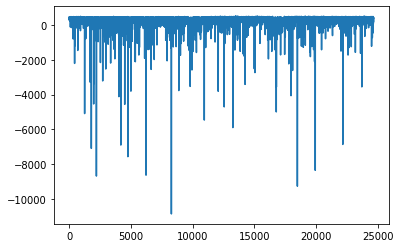

In [129]:
plt.plot(score)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


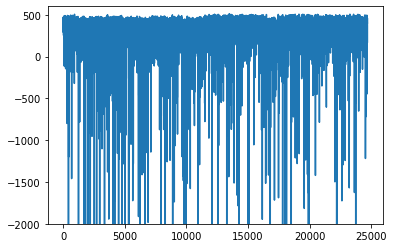

In [134]:
plt.plot(score)
ax = plt.axes()
ax.set_ylim(-2000, 600)
plt.show()

In [131]:
print(score)

[342.61315764 455.73643524 442.35902147 ... 417.54539889 446.76530296
 400.83267278]
